<a href="https://colab.research.google.com/github/Lightola/light-wprk/blob/main/9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
data = pd.read_csv("/content/Uber-Jan-Feb-FOIL.csv")

In [3]:
# Explore Dataset
print(data.head())
print(data.info())

  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None


In [18]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

In [19]:
# Extract day, month, year, weekday
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['weekday'] = data['date'].dt.day_name()

  dispatching_base_number       date  active_vehicles  trips  day  month  \
0                  B02512 2015-01-01              190   1132    1      1   
1                  B02765 2015-01-01              225   1765    1      1   
2                  B02764 2015-01-01             3427  29421    1      1   
3                  B02682 2015-01-01              945   7679    1      1   
4                  B02617 2015-01-01             1228   9537    1      1   

   year   weekday  
0  2015  Thursday  
1  2015  Thursday  
2  2015  Thursday  
3  2015  Thursday  
4  2015  Thursday  


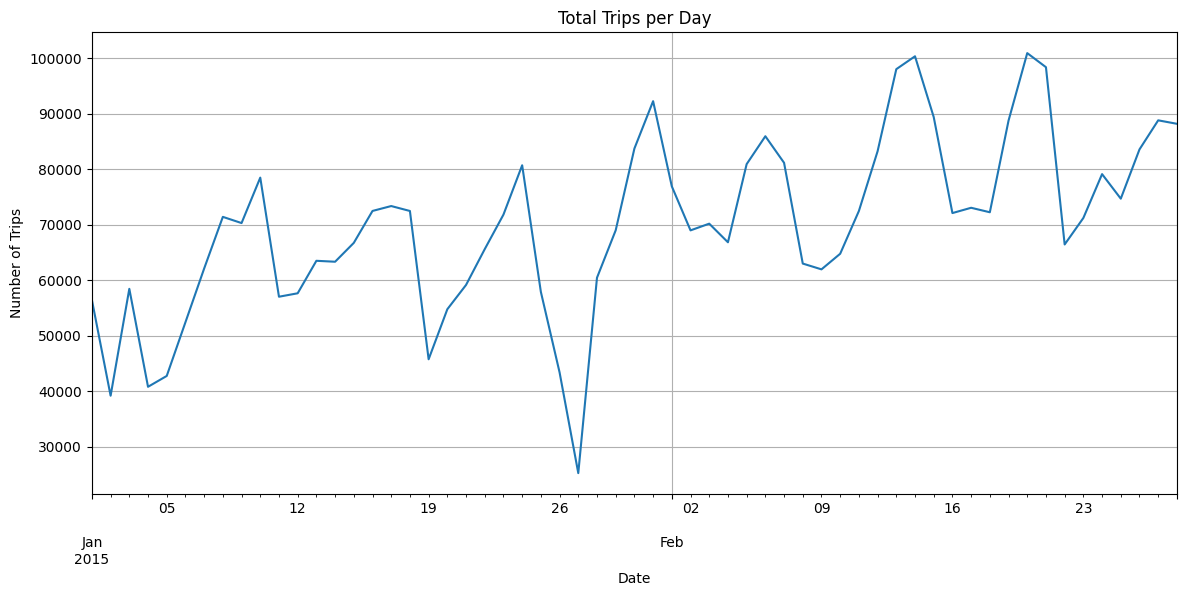

In [20]:
# Quick look at the data
print(data.head())

# 1. What are the busiest days for trips?
daily_trips = data.groupby('date')['trips'].sum()

plt.figure(figsize=(14,6))
daily_trips.plot()
plt.title('Total Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


<ipython-input-21-ad58866ae469>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=base_trips.index, y=base_trips.values, palette='magma')


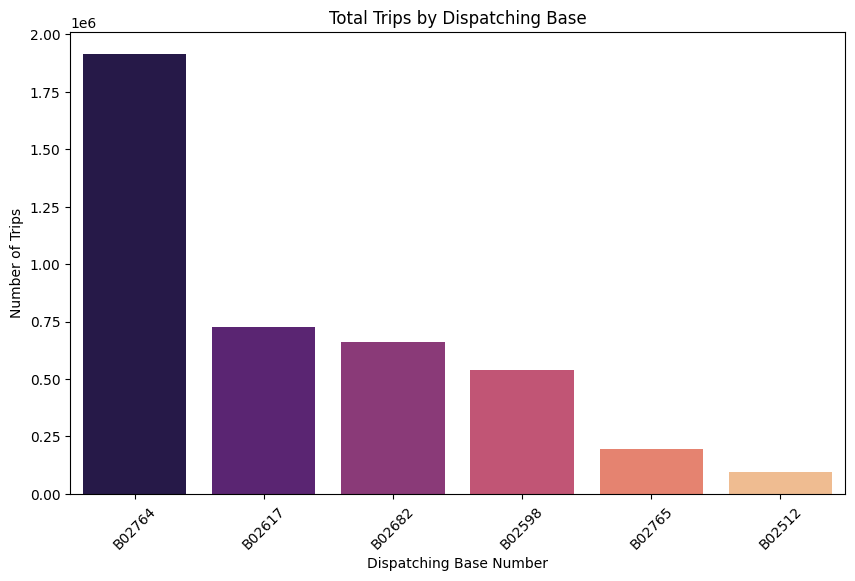

In [21]:
# 2. Which dispatch bases have the highest demand?
base_trips = data.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=base_trips.index, y=base_trips.values, palette='magma')
plt.title('Total Trips by Dispatching Base')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

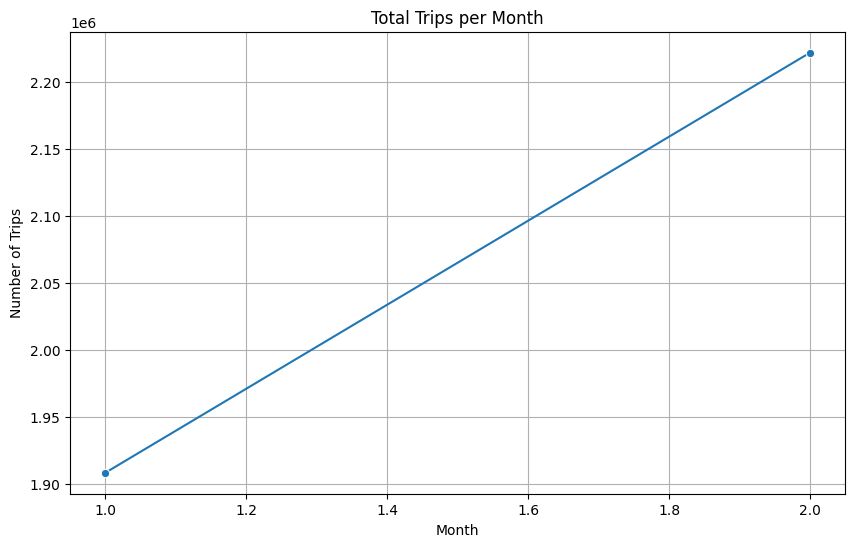

In [22]:
# 3. Are there monthly variations in trip demand?
monthly_trips = data.groupby('month')['trips'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_trips.index, y=monthly_trips.values, marker='o')
plt.title('Total Trips per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

<ipython-input-23-1120b8785523>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_trips.index, y=weekday_trips.values, order=weekday_order, palette='coolwarm')


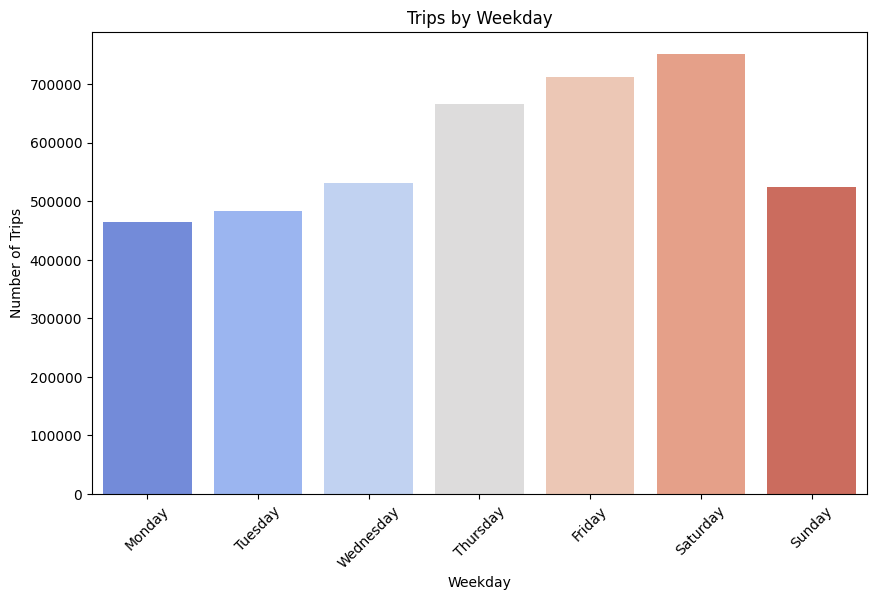

In [23]:
# 4. Busiest Weekdays
weekday_trips = data.groupby('weekday')['trips'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_trips.index, y=weekday_trips.values, order=weekday_order, palette='coolwarm')
plt.title('Trips by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

In [24]:
# 5. Summary Statistics
busiest_day = daily_trips.idxmax()
busiest_trips = daily_trips.max()

print(f"Busiest day overall: {busiest_day.date()} with {busiest_trips} trips.")

top_base = base_trips.idxmax()
top_base_trips = base_trips.max()

print(f"Top dispatching base: {top_base} with {top_base_trips} total trips.")

Busiest day overall: 2015-02-20 with 100915 trips.
Top dispatching base: B02764 with 1914449 total trips.
